In [299]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score, accuracy_score, classification_report



In [300]:
sp500 = yf.Ticker("^GSPC")

In [301]:
sp_df = sp500.history(period="max")

In [302]:
dir(sp500)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_analysis',
 '_data',
 '_download_options',
 '_earnings',
 '_earnings_dates',
 '_expirations',
 '_fast_info',
 '_fetch_ticker_tz',
 '_financials',
 '_fundamentals',
 '_get_ticker_tz',
 '_holders',
 '_isin',
 '_lazy_load_price_history',
 '_news',
 '_options2df',
 '_price_history',
 '_quote',
 '_shares',
 '_tz',
 '_underlying',
 'actions',
 'analyst_price_target',
 'balance_sheet',
 'balancesheet',
 'basic_info',
 'calendar',
 'capital_gains',
 'cash_flow',
 'cashflow',
 'dividends',
 'earnings',
 'earnings_dates',
 'earnings_forecasts',
 'earnings_trend',
 'fast_info',
 'financials',
 'get_actions',
 'get

In [303]:
sp_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [304]:
# Initialize the Ticker object for S&P 500
sp500 = yf.Ticker('^GSPC')

# Fetch basic info
info = sp500.info
print("Basic Info:", info)

Basic Info: {'maxAge': 86400, 'priceHint': 2, 'previousClose': 5199.5, 'open': 5252.57, 'dayLow': 5233.85, 'dayHigh': 5328.03, 'regularMarketPreviousClose': 5199.5, 'regularMarketOpen': 5252.57, 'regularMarketDayLow': 5233.85, 'regularMarketDayHigh': 5328.03, 'volume': 2678076000, 'regularMarketVolume': 2678076000, 'averageVolume': 3925853225, 'averageVolume10days': 4380199000, 'averageDailyVolume10Day': 4380199000, 'bid': 5269.15, 'ask': 5396.81, 'fiftyTwoWeekLow': 4103.78, 'fiftyTwoWeekHigh': 5669.67, 'fiftyDayAverage': 5444.8423, 'twoHundredDayAverage': 5026.43, 'currency': 'USD', 'exchange': 'SNP', 'quoteType': 'INDEX', 'symbol': '^GSPC', 'underlyingSymbol': '^GSPC', 'shortName': 'S&P 500', 'longName': 'S&P 500', 'firstTradeDateEpochUtc': -1325583000, 'timeZoneFullName': 'America/New_York', 'timeZoneShortName': 'EDT', 'uuid': '8ffd55d1-3d1d-3733-a480-56768bc708e6', 'messageBoardId': 'finmb_INDEXGSPC', 'gmtOffSetMilliseconds': -14400000, 'trailingPegRatio': None}


In [305]:
# Fetch historical data
hist = sp500.history(period='1y')
print("Historical Data:", hist.head())

Historical Data:                                   Open         High          Low        Close  \
Date                                                                            
2023-08-09 00:00:00-04:00  4501.569824  4502.439941  4461.330078  4467.709961   
2023-08-10 00:00:00-04:00  4487.160156  4527.370117  4457.919922  4468.830078   
2023-08-11 00:00:00-04:00  4450.689941  4476.229980  4443.979980  4464.049805   
2023-08-14 00:00:00-04:00  4458.129883  4490.330078  4453.439941  4489.720215   
2023-08-15 00:00:00-04:00  4478.870117  4478.870117  4432.189941  4437.859863   

                               Volume  Dividends  Stock Splits  
Date                                                            
2023-08-09 00:00:00-04:00  3803100000        0.0           0.0  
2023-08-10 00:00:00-04:00  4504370000        0.0           0.0  
2023-08-11 00:00:00-04:00  3753290000        0.0           0.0  
2023-08-14 00:00:00-04:00  3896410000        0.0           0.0  
2023-08-15 00:00:00-04:00

In [306]:
# Example of creating moving averages
hist['50_MA'] = hist['Close'].rolling(window=50).mean()
hist['200_MA'] = hist['Close'].rolling(window=200).mean()

# Drop rows with NaN values (resulting from rolling window calculations)
hist = hist.dropna()
print("Processed Historical Data:", hist.head())

Processed Historical Data:                                   Open         High          Low        Close  \
Date                                                                            
2024-05-23 00:00:00-04:00  5340.259766  5341.879883  5256.930176  5267.839844   
2024-05-24 00:00:00-04:00  5281.450195  5311.649902  5278.390137  5304.720215   
2024-05-28 00:00:00-04:00  5315.910156  5315.910156  5280.890137  5306.040039   
2024-05-29 00:00:00-04:00  5278.729980  5282.270020  5262.700195  5266.950195   
2024-05-30 00:00:00-04:00  5259.770020  5260.209961  5222.100098  5235.479980   

                               Volume  Dividends  Stock Splits        50_MA  \
Date                                                                          
2024-05-23 00:00:00-04:00  3869520000        0.0           0.0  5169.590820   
2024-05-24 00:00:00-04:00  3005510000        0.0           0.0  5172.675625   
2024-05-28 00:00:00-04:00  3751540000        0.0           0.0  5176.454629   
2024-05-29

In [307]:
# Add features based on basic info
basic_info = {
    '52_Week_High': 5669.67,
    '52_Week_Low': 4103.78,
    'Average_Volume': 3925853225
}

# Create a DataFrame from basic info for feature engineering
info_df = pd.DataFrame([basic_info] * len(hist), index=hist.index)

# Combine with historical data
combined_df = pd.concat([hist, info_df], axis=1)
print("Combined Data:", combined_df.head())

Combined Data:                                   Open         High          Low        Close  \
Date                                                                            
2024-05-23 00:00:00-04:00  5340.259766  5341.879883  5256.930176  5267.839844   
2024-05-24 00:00:00-04:00  5281.450195  5311.649902  5278.390137  5304.720215   
2024-05-28 00:00:00-04:00  5315.910156  5315.910156  5280.890137  5306.040039   
2024-05-29 00:00:00-04:00  5278.729980  5282.270020  5262.700195  5266.950195   
2024-05-30 00:00:00-04:00  5259.770020  5260.209961  5222.100098  5235.479980   

                               Volume  Dividends  Stock Splits        50_MA  \
Date                                                                          
2024-05-23 00:00:00-04:00  3869520000        0.0           0.0  5169.590820   
2024-05-24 00:00:00-04:00  3005510000        0.0           0.0  5172.675625   
2024-05-28 00:00:00-04:00  3751540000        0.0           0.0  5176.454629   
2024-05-29 00:00:00-04

In [308]:
# Fetch historical data for S&P 500
sp500 = yf.Ticker('^GSPC')
history = sp500.history(period='10y')  # Get 10 years of data

In [329]:
# Calculate the 7-day rolling mean of the 'Close' price
sp_df['Rolling_Mean_7'] = sp_df['Close'].rolling(window=7).mean()

# Check if the column is added successfully
print(sp_df[['Close', 'Rolling_Mean_7']].head(10))

                               Close  Rolling_Mean_7
Date                                                
1927-12-30 00:00:00-05:00  17.660000             NaN
1928-01-03 00:00:00-05:00  17.760000             NaN
1928-01-04 00:00:00-05:00  17.719999             NaN
1928-01-05 00:00:00-05:00  17.549999             NaN
1928-01-06 00:00:00-05:00  17.660000             NaN
1928-01-09 00:00:00-05:00  17.500000             NaN
1928-01-10 00:00:00-05:00  17.370001       17.602857
1928-01-11 00:00:00-05:00  17.350000       17.558571
1928-01-12 00:00:00-05:00  17.469999       17.517143
1928-01-13 00:00:00-05:00  17.580000       17.497143


In [330]:
print(history.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Rolling_Mean_7', 'Target'],
      dtype='object')


In [331]:
# Example: Create a binary target variable where 1 indicates the market went up and 0 indicates it went down
sp_df['Target'] = (sp_df['Close'].shift(-1) > sp_df['Close']).astype(int)

# Verify the Target column
print(sp_df[['Close', 'Target']].tail(10))

                                 Close  Target
Date                                          
2024-07-26 00:00:00-04:00  5459.100098       1
2024-07-29 00:00:00-04:00  5463.540039       0
2024-07-30 00:00:00-04:00  5436.439941       1
2024-07-31 00:00:00-04:00  5522.299805       0
2024-08-01 00:00:00-04:00  5446.680176       0
2024-08-02 00:00:00-04:00  5346.560059       0
2024-08-05 00:00:00-04:00  5186.330078       1
2024-08-06 00:00:00-04:00  5240.029785       0
2024-08-07 00:00:00-04:00  5199.500000       1
2024-08-08 00:00:00-04:00  5319.310059       0


In [337]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [338]:
# Split the data into training and testing sets
train = sp_df.iloc[:-100]
test = sp_df.iloc[-100:]

In [339]:
# Choose predictors
predictors = ["Close", "Volume", "Open", "High", "Low", "Rolling_Mean_7"]

In [314]:
# Train your RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=10)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [340]:
from sklearn.metrics import precision_score

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=10)

In [341]:
sp_df.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-26 00:00:00-04:00', '2024-07-29 00:00:00-04:00',
               '2024-07-30 00:00:00-04:00', '2024-07-31 00:00:00-04:00',
               '2024-08-01 00:00:00-04:00', '2024-08-02 00:00:00-04:00',
               '2024-08-05 00:00:00-04:00', '2024-08-06 00:00:00-04:00',
               '2024-08-07 00:00:00-04:00', '2024-08-08 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24267, freq=None)

<Axes: xlabel='Date'>

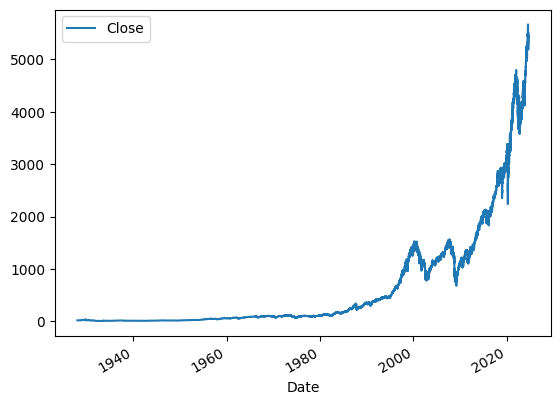

In [342]:
sp_df.plot.line(y="Close", use_index=True)

In [343]:
#Data cleaning 
del sp_df["Dividends"]
del sp_df["Stock Splits"]

KeyError: 'Dividends'

In [344]:
#Predict tomorrow $
sp_df["Tomorrow"] = sp_df["Close"].shift(-1) #shift columns back by a day
sp_df

,Open,High,Low,Close,Volume,Tomorrow,Target,Rolling_Mean_7
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1,NaN
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0,NaN
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0,NaN
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1,NaN
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0,NaN
...,...,...,...,...,...,...,...,...
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,5186.330078,0,5439.120047
2024-08-05 00:00:00-04:00,5151.140137,5250.890137,5119.259766,5186.330078,5333250000,5240.029785,1,5408.707171
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,5199.500000,0,5377.411412


In [345]:
#Set up target (show as integer - astype) 
sp_df["Target"]= (sp_df["Tomorrow"] > sp_df["Close"]).astype(int)

In [346]:
sp_df

,Open,High,Low,Close,Volume,Tomorrow,Target,Rolling_Mean_7
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1,NaN
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0,NaN
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0,NaN
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1,NaN
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0,NaN
...,...,...,...,...,...,...,...,...
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,5186.330078,0,5439.120047
2024-08-05 00:00:00-04:00,5151.140137,5250.890137,5119.259766,5186.330078,5333250000,5240.029785,1,5408.707171
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,5199.500000,0,5377.411412


In [347]:
#Start to train first ML model (RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier

#Train individual decision trees using n_estimator(want to max this out if possible)
#Min_sample_split = defend against overfitting higher - less accurate but less overfitting, need to optimize 
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#Train model to predict stock price 
train = sp_df.iloc[:-100]
test = sp_df.iloc[-100:]

#choose predictors 
predictors = ["Close", "Volume", "Open", "High", "Low", "Rolling_Mean_7"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [348]:
dict(zip(predictors,model.feature_importances_))

{'Close': 0.16992435166538183,
 'Volume': 0.1691964192587838,
 'Open': 0.1284614429297149,
 'High': 0.16768090445658995,
 'Low': 0.1670554057423408,
 'Rolling_Mean_7': 0.19768147594718866}

In [349]:
#Measure if model is doing what we want 
from sklearn.metrics import precision_score, classification_report

preds = model.predict(test[predictors]) 

import pandas as pd
preds = pd.Series(preds, index=test.index)

In [350]:
#Precision Score kind of shit need adjustment
precision_score(test["Target"], preds)

0.5384615384615384

<Axes: xlabel='Date'>

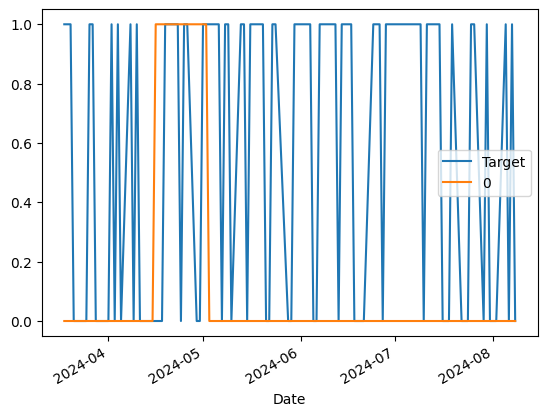

In [351]:
#Combine actcual values with predictive values 
combined = pd.concat([test["Target"], preds], axis =1)
combined.plot()

In [352]:
#Orange = predict, Blue = actual 

#Build Backtest

#Create prediction function 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis =1)
    return combined

In [353]:
#Write backtest function - 250 trainiing days, 2500 = 10 years worth of predicting 
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    #Create training and test sets - train (years prior), test(curret year)
    for i in range (start, data.shape[0], step): 
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions) 
    return pd.concat(all_predictions) #takes list and combines them into one df

        

In [355]:
#Backtest with data from earlier
predictions = backtest (sp_df, model, predictors)

KeyboardInterrupt: 

In [ ]:
#Evaluate error of prediction
predictions["Predictions"].value_counts()

#Market go up 2602, decrease 3614

Predictions
0    3615
1    2602
Name: count, dtype: int64

In [ ]:
#Look at precision score 
precision_score(predictions["Target"], predictions["Predictions"])

#53% accuracy 

0.5292083013066872

In [ ]:
# number of days when market actuially went up 
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535146
0    0.464854
Name: count, dtype: float64

In [ ]:
dict(zip(predictors,model.feature_importances_))

{'Close': 0.1932287740688512,
 'Volume': 0.2367786957350592,
 'Open': 0.19143544484382702,
 'High': 0.18307058327512069,
 'Low': 0.19548650207714185}

In [ ]:
#Add predictors to this shit model to improve accuracy 
#Horizons on which we want to look at rolling means, mean close price on 2 days, 5 days, etc...
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    #Add columns to sp500 df, gives close price / rolling average (ratio between todays close and the past 2 days, 5 days, etc...) 
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    #Days the stock price actually went up, shift forward and find rolling sum of Target
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

In [ ]:
#Add variables to new_predictors 

new_predictors += [ratio_column, trend_column]

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059,0,0.993106,1.0,0.996536,3.0,1.005682,37.0,1.115425,141.0,1.270120,527.0
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,5186.330078,0,0.990724,0.0,0.982263,2.0,0.986714,36.0,1.094143,141.0,1.246188,527.0
2024-08-05 00:00:00-04:00,5151.140137,5250.890137,5119.259766,5186.330078,5333250000,5240.029785,1,0.984788,0.0,0.962631,1.0,0.957147,36.0,1.060773,140.0,1.208333,526.0


In [ ]:
sp500 = sp500.dropna()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059,0,0.993106,1.0,0.996536,3.0,1.005682,37.0,1.115425,141.0,1.270120,527.0
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,5186.330078,0,0.990724,0.0,0.982263,2.0,0.986714,36.0,1.094143,141.0,1.246188,527.0
2024-08-05 00:00:00-04:00,5151.140137,5250.890137,5119.259766,5186.330078,5333250000,5240.029785,1,0.984788,0.0,0.962631,1.0,0.957147,36.0,1.060773,140.0,1.208333,526.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
#Incorporate prob (probabilibity) that the value will be a 0 or 1 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    
    #Set Custoom threshold 
    preds[preds >= .6] = 1
    preds[preds < .6] = 0   #making threshold 60% model has to be more confident in price increase (quality over quantity)
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis =1)
    return combined

In [ ]:
#Backtest w new preidctors 
predictions = backtest(sp500, model, new_predictors)

In [ ]:
#look at value counts of the predictions 
predictions["Predictions"].value_counts()

Predictions
0.0    3785
1.0    1431
Name: count, dtype: int64

In [ ]:
#Somehow went down? 
precision_score(predictions["Target"], predictions["Predictions"])

0.5122292103424179

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,SMA_10,SMA_50,Volatility
Date,,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0,NaN,NaN,NaN
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0,NaN,NaN,NaN
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0,NaN,NaN,NaN
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0,NaN,NaN,NaN
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059,0,0.993106,1.0,0.996536,3.0,1.005682,37.0,1.115425,141.0,1.270120,527.0,5477.956055,5449.148203,77.190745
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,5186.330078,0,0.990724,0.0,0.982263,2.0,0.986714,36.0,1.094143,141.0,1.246188,527.0,5462.112061,5449.651201,87.842497
2024-08-05 00:00:00-04:00,5151.140137,5250.890137,5119.259766,5186.330078,5333250000,5240.029785,1,0.984788,0.0,0.962631,1.0,0.957147,36.0,1.060773,140.0,1.208333,526.0,5424.304053,5447.237607,115.424507


In [ ]:
sp500.dropna

<bound method DataFrame.dropna of                                   Open         High          Low        Close  \
Date                                                                            
1993-12-14 00:00:00-05:00   465.730011   466.119995   462.459991   463.059998   
1993-12-15 00:00:00-05:00   463.059998   463.690002   461.839996   461.839996   
1993-12-16 00:00:00-05:00   461.859985   463.980011   461.859985   463.339996   
1993-12-17 00:00:00-05:00   463.339996   466.380005   463.339996   466.380005   
1993-12-20 00:00:00-05:00   466.380005   466.899994   465.529999   465.850006   
...                                ...          ...          ...          ...   
2024-08-01 00:00:00-04:00  5537.839844  5566.160156  5410.419922  5446.680176   
2024-08-02 00:00:00-04:00  5376.629883  5383.890137  5302.029785  5346.560059   
2024-08-05 00:00:00-04:00  5151.140137  5250.890137  5119.259766  5186.330078   
2024-08-06 00:00:00-04:00  5206.419922  5312.339844  5193.560059  5240.0297

In [ ]:
dict(zip(predictions,model.feature_importances_))

{'Target': 0.14186182594605473, 'Predictions': 0.06482083890686396}

In [ ]:
#Add Tech indictaors - Moving Averages, Relative Strength Index (RSI), MACD, Bollinger Bands

sp500['SMA_10'] = sp500['Close'].rolling(window=10).mean()
sp500['SMA_50'] = sp500['Close'].rolling(window=50).mean()
sp500['Volatility'] = sp500['Close'].rolling(window=20).std()

In [ ]:
#Add new predictors to df 
new_predictors += ['SMA_10 column', 'SMA_50 column', 'Volatility column']

In [ ]:
sp500.dropna

<bound method DataFrame.dropna of                                   Open         High          Low        Close  \
Date                                                                            
1993-12-14 00:00:00-05:00   465.730011   466.119995   462.459991   463.059998   
1993-12-15 00:00:00-05:00   463.059998   463.690002   461.839996   461.839996   
1993-12-16 00:00:00-05:00   461.859985   463.980011   461.859985   463.339996   
1993-12-17 00:00:00-05:00   463.339996   466.380005   463.339996   466.380005   
1993-12-20 00:00:00-05:00   466.380005   466.899994   465.529999   465.850006   
...                                ...          ...          ...          ...   
2024-08-01 00:00:00-04:00  5537.839844  5566.160156  5410.419922  5446.680176   
2024-08-02 00:00:00-04:00  5376.629883  5383.890137  5302.029785  5346.560059   
2024-08-05 00:00:00-04:00  5151.140137  5250.890137  5119.259766  5186.330078   
2024-08-06 00:00:00-04:00  5206.419922  5312.339844  5193.560059  5240.0297

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,...,Close_Ratio_1000,Trend_1000,SMA_10,SMA_50,Volatility,EMA_10,EMA_50,SMA_20,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,...,1.176082,512.0,NaN,NaN,NaN,463.059998,463.059998,NaN,NaN,NaN
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,...,1.172676,512.0,NaN,NaN,NaN,462.838179,463.012154,NaN,NaN,NaN
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,...,1.176163,513.0,NaN,NaN,NaN,462.929419,463.025011,NaN,NaN,NaN
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,...,1.183537,514.0,NaN,NaN,NaN,463.556798,463.156579,NaN,NaN,NaN
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,...,1.181856,513.0,NaN,NaN,NaN,463.973745,463.262204,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059,0,0.993106,1.0,0.996536,...,1.270120,527.0,5477.956055,5449.148203,77.190745,5484.297939,5438.780151,5538.083057,5692.464546,5383.701568
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,5186.330078,0,0.990724,0.0,0.982263,...,1.246188,527.0,5462.112061,5449.651201,87.842497,5459.254688,5435.163677,5527.051562,5702.736556,5351.366569
2024-08-05 00:00:00-04:00,5151.140137,5250.890137,5119.259766,5186.330078,5333250000,5240.029785,1,0.984788,0.0,0.962631,...,1.208333,526.0,5424.304053,5447.237607,115.424507,5409.632031,5425.405496,5507.725562,5738.574575,5276.876548


In [ ]:
#Fine-tuning the model
model = RandomForestClassifier(n_estimators=500, min_samples_split=50, max_depth=10, random_state=1)

In [ ]:
#Backtest with new predictors
predictions = backtest(sp500, model, new_predictors) 

In [ ]:
# Evaluate precision
precision_score(predictions["Target"], predictions["Predictions"])

0.5498154981549815

In [ ]:
dict(zip(predictors,model.feature_importances_))

{'Close': 0.14186182594605473,
 'Volume': 0.06482083890686396,
 'Open': 0.10814623463807409,
 'High': 0.09864648964796278,
 'Low': 0.1576559006907624}

In [ ]:
#Add exponential moving averages 
sp500['EMA_10'] = sp500['Close'].ewm(span=10, adjust=False).mean()
sp500['EMA_50'] = sp500['Close'].ewm(span=50, adjust=False).mean()
new_predictors += ['EMA_10', 'EMA_50']

In [ ]:
#Backtest with new predictors
predictions = backtest(sp500, model, new_predictors) 

In [ ]:
# Evaluate precision
precision_score(predictions["Target"], predictions["Predictions"])

0.5499058380414312

In [ ]:
dict(zip(predictors,model.feature_importances_))

{'Close': 0.16572685610757698,
 'Volume': 0.08312571222615808,
 'Open': 0.1482545652126977,
 'High': 0.1380055077956094,
 'Low': 0.17434452235191084}

In [ ]:
#Bollinger Bands: calculate SMA 

sp500['SMA_20'] = sp500['Close'].rolling(window=20).mean()

In [ ]:
sp500['Upper_Band'] = sp500['SMA_20'] + (sp500['Close'].rolling(window=20).std() * 2)
sp500['Lower_Band'] = sp500['SMA_20'] - (sp500['Close'].rolling(window=20).std() * 2)

In [ ]:
new_predictors += ['Upper_Band', 'Lower_Band']

In [ ]:
#Backtest with new predictors
predictions = backtest(sp500, model, new_predictors) 

In [ ]:
# Evaluate precision
precision_score(predictions["Target"], predictions["Predictions"])

0.5364963503649635

In [ ]:
dict(zip(predictors,model.feature_importances_))

{'Close': 0.14186182594605473,
 'Volume': 0.06482083890686396,
 'Open': 0.10814623463807409,
 'High': 0.09864648964796278,
 'Low': 0.1576559006907624}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define your features and target
X = sp500[new_predictors]  # Features
y = sp500['Target']        # Target variable

# Initialize your model
model = RandomForestClassifier(n_estimators=500, min_samples_split=50, max_depth=10, random_state=1)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print individual fold scores and mean score
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Cross-Validation Scores: [0.53726507 0.50486066 0.53208036 0.53208036 0.47375243]
Mean CV Score: 0.5160077770576799


In [ ]:
import timeit

# Replace 5 with your estimated average fit time in seconds
estimated_fit_time = 5 
total_fits = 3375

estimated_total_time = estimated_fit_time * total_fits
print(f"Estimated total time: {estimated_total_time} seconds")

# Convert to hours for readability
hours = estimated_total_time / 3600
print(f"Approximately {hours:.2f} hours")

Estimated total time: 16875 seconds
Approximately 4.69 hours


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import timeit

# Define the model
model = RandomForestClassifier(random_state=1)

# Corrected parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']  # Use None instead of 'auto'
}

# Limit the number of parameter combinations to test
n_iter_search = 50  # Adjust based on desired time

# RandomizedSearchCV with reduced grid and iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=n_iter_search, cv=5, random_state=1)

# Estimate the execution time
estimated_fit_time = 5  # Replace with an estimated average fit time in seconds
total_fits = n_iter_search * 5  # Multiply by 5 for 5-fold CV

estimated_total_time = estimated_fit_time * total_fits
hours = estimated_total_time / 3600

print(f"Estimated total time: {estimated_total_time:.2f} seconds")
print(f"Approximately {hours:.2f} hours")

# Time the execution of the random search
execution_time = timeit.timeit(lambda: random_search.fit(X, y), number=1)
print(f"Random search completed in {execution_time:.2f} seconds")

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Mean CV Score: {random_search.best_score_}")


Estimated total time: 1250.00 seconds
Approximately 0.35 hours
Random search completed in 1913.53 seconds
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best Mean CV Score: 0.5184705119896307


In [ ]:
import certifi
import os

os.environ['SSL_CERT_FILE'] = certifi.where()

In [ ]:
from fredapi import Fred

# Replace 'YOUR_API_KEY' with your FRED API key
fred = Fred(api_key='96cc085425b5f1a1c8b880f5d05d19f8')

In [ ]:
# Correct series ID for Sahm Economic Stress Index
series_id = 'SAHMCURRENT'

try:
    sahm_data = fred.get_series(series_id)
    print(sahm_data.head())
except ValueError as e:
    print(f"Error fetching data: {e}")

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

In [ ]:
import time
import logging

logging.basicConfig(level=logging.INFO)

start_time = time.time()
grid_search.fit(X, y)
end_time = time.time()
logging.info(f"Grid search completed in {end_time - start_time:.2f} seconds")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=1)
random_search.fit(X, y)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Mean CV Score: {random_search.best_score_}")


In [ ]:
results = grid_search.cv_results_
print(f"Total combinations: {len(results['params'])}")
print(f"Combinations evaluated so far: {np.sum(results['mean_test_score'] > 0)}")

In [ ]:
#Explore paramter values 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Mean CV Score: {grid_search.best_score_}")

In [ ]:
from fredapi import Fred

# Initialize FRED API
api_key = '96cc085425b5f1a1c8b880f5d05d19f8'  # Replace with your FRED API key
fred = Fred(api_key=api_key)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>